# Logistic Loss

You will:
* explore the reason why the squared error loss is not appropriate for logistic regression
* explore the logistic loss function

### Squared error for logistic regression

Recall for **Linear** Regression we have used the **squared error cost function**:
The equation for the squared error cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

This cost function worked well for linear regression.

However, in logistic regression as we have arleady seen $f_{w,b}(x)$ has a non-linear component, the sigmoid function: $f_{w,b}(x^{(i)}) = sigmoid(w \cdot x^{(i)} + b).

Let's take a look of an example.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x_train=np.array([0., 1, 2, 3, 4, 5], dtype=np.longdouble)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.longdouble)

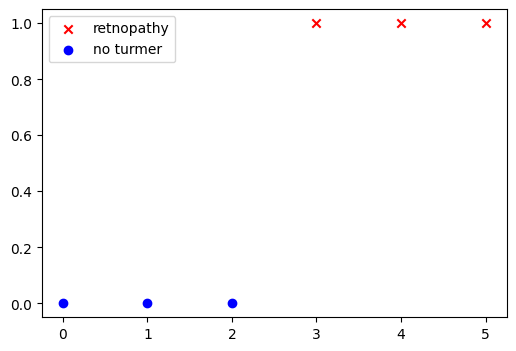

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(x_train[y_train==1], y_train[y_train==1], color='red', marker='x', label='retnopathy')
plt.scatter(x_train[y_train==0], y_train[y_train==0], color='blue', marker='o', label='no turmer')
plt.legend()
plt.show()

From the above plot you can see clearly that even our datadestribution is non-linear.

So we need to have other form of cost function .

### Logistic Loss Function

Logistic regression uses a loss fucntion more suitable for the task of categorization where the target is $0$ or $1$ rather than any number.

**Loss**
* this is the measure of the difference of a single example to it's target value, $loss(f_{w,b}(\mathbf{x^{(i)}},y^{(i)}))$

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}

* where:
  * $f_{w,b}(\mathbf{x^{(i)}})$ is the model prediction.
  * $y^{(i)}$ is the target value.
  * $f_{w,b}(\mathbf{x^{(i)}}) = g(\mathbf{w \cdot x^{(i)}} + b)$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

![log loss](images/loss_curve.png)


Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.

Now, the loos function can be re-written to be easier to implement.

$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

where:
* if $y^{(i)} = 0$. 
    * then 
          $$
          \begin{align}
            loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
            &= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
          \end{align}
          $$

* if $y^{(i)} = 0$. 
    * then
          $$
          \begin{align}
            loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
            &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
          \end{align}
          $$

**cost**
* this is the measure of the difference of a training set example to it's target value, $\mathbf{J}(\mathbf{w}, b)$

$$\mathbf{J}(\mathbf{w}, b) = \frac{1}{m} \sum _{i=0}^{m-1} \left[loss(f_{w,b}({\mathbf{x}^{(i)}}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

#### Code

**Python - imports**

**C - imports**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Python - sigmoid() function**

**C - sigmoid() function**

In [4]:
def sigmoid(z_i):
    """
    Compute sigmoid

    Args:
        z_i (scalar ):  target values

    Returns:
        sigmoid (scalar ):  sigmoid
    """

    return 1/(1 + np.exp(-z_i))

**Python - cost() function**

**C - cost() function**

In [5]:


def compute_cost_logistic(X, y, w, b):
    """
    Compute cost

    Args:
        X (ndarray (m,n)):  Data, m exapmles with n features
        y (ndarray (m, )):  target values
        w (ndarray (n, )):  model parameters
        b (scalar) .     :  model parameter

    Returns:
        cost (scalar):  cost
    """

    m=X.shape[0]
    cost=0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1 - y[i])*np.log(1 - f_wb_i)
    cost /=m
    
    return cost

**Python - main() function**

**C - main() function**

In [6]:
def main():


    X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
    y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

    w_tmp = np.array([1, 1])
    b_tmp = -3

    cost=compute_cost_logistic(X_train, y_train, w_tmp, b_tmp)
    print("Cost for b = -3 : ",cost)

if __name__ == "__main__":
    main()


Cost for b = -3 :  0.36686678640551745


Let's try to see what will be the cost for a different value of b
* if $w_{0} = 1$ , $w_{1} = 1$ and $b = -4$

In [7]:
def main():


    X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
    y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

    w_tmp = np.array([1, 1])
    b_tmp = -4

    cost=compute_cost_logistic(X_train, y_train, w_tmp, b_tmp)
    print("Cost for b = -3 : ",cost)

if __name__ == "__main__":
    main()


Cost for b = -3 :  0.5036808636748461


Let us plot the decision boundary for these two different values of $b$.
* For $b = -3$, $w_{0} = 1$ and $w_{1} = 1$, we will plot $-3 + x_{0} + x_{1} = 0$ (shown in blue)
* For $b = -4$, $w_{0} = 1$ and $w_{1} = 1$, we will plot $-4 + x_{0} + x_{1} = 0$ (shown in magenta)

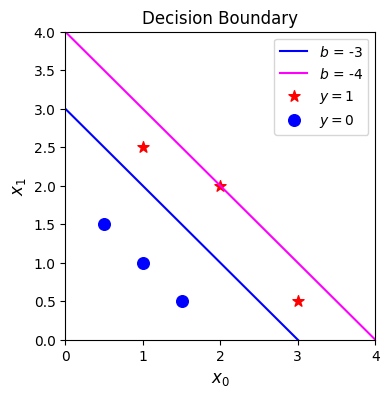

In [14]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, color="blue", label="$b$ = -3")
ax.plot(x0,x1_other, color="magenta", label="$b$ = -4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], marker='*', color='red', s=70, label='$y = 1$')
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], marker='o', color='blue', s=70, label='$y = 0$')
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

**Since**
* Cost for b = -3 :  0.36686678640551745
* Cost for b = -4 :  0.5036808636748461

We can see the cost function behaves as expected and the cost for $w_{0} = 1$, $w_{1} = 1$ and $b = -3$ is indeed higher than the cost for $w_{0} = 1$, $w_{1} = 1$ and $b = -4$ 